In [79]:
A = np.array([[2, 1, 1],
                  [2, 3, 1],
                  [1, 1, 3]])
b = np.array([2, 4, -1])

In [80]:
import numpy as np
from matplotlib import pyplot as plt
 
def jacobi(A, b, tolerance):
    ''' 連立方程式をヤコビ法（反復法）で解く '''
 
    # 初期化（適当な解と残差）
    x0 = [0, 0, 0]
    residual = 1e20 #残差
 
    # A = D(対角行列) + R(R := L + U)
    D = np.diag(A)
    R = A - np.diag(D)
 
    # 反復計算=>残差がトレランスより小さくなったら終了
    i = 0
    print('----------Start iteration----------')
    res = []
    while residual > tolerance:
        # 解と残差を計算
        x = (b - (R @ x0)) / D
        # xがbでx0がAxのつもりで、どれだけ解が欲しいターゲットの値と乖離しているかを計算している。
        denominator = np.sqrt((x - x0) ** 2)
        numerator = np.sqrt(x ** 2)
        residual = np.sum(denominator) / np.sum(numerator)
        res.append(residual)

        # 100回ごとの誤差を出力
        if i % 100 == 0:
            print('Iteration=', i)
            print('Residual=', residual)
            print('x=', x)
        i += 1
        x0 = x
 
    print('----------End iteration----------')
    print('Iteration=', i)
    print('Residual=', residual)
    print('x=', x, '\n')
 
    return x, res

In [81]:
# ヤコビ法で解を反復計算
x_jacobi, res1 = jacobi(A, b, 1e-6)
print('Jacobi method x=', x_jacobi, 'Validated b=', A @ x_jacobi)

----------Start iteration----------
Iteration= 0
Residual= 1.0
x= [ 1.          1.33333333 -0.33333333]
Iteration= 100
Residual= 8.38132348855169e-06
x= [ 1.00000426  1.00000438 -0.99999678]
----------End iteration----------
Iteration= 120
Residual= 9.792092347849907e-07
x= [ 0.9999995   0.99999949 -1.00000038] 

Jacobi method x= [ 0.9999995   0.99999949 -1.00000038] Validated b= [ 1.99999812  3.99999709 -1.00000214]


In [82]:
def gauss_seidel(A, b, tolerance):
    ''' 連立方程式をガウス・ザイデル法（反復法）で解く '''

    # 初期化（適当な解と残差）
    x = np.random.random(len(b))
    residual = 1e20
 
    # 係数行列を分解:D=対角成分ベクトル、R=剰余行列
    D = np.diag(A)
    R = A - np.diag(D)
 
    # 反復計算（逐次求めた解を次のループで使うため、forを使っている）
    iteration = 0
    print('----------Start iteration----------')
    res = []
    while residual > tolerance:
        # 収束判定用の1ステップ前の解を保持
        x0 = x.copy()
 
        # 逐次計算
        for i in range(len(x)):
            x[i] = (b[i] - R[i] @ x) / D[i]
 
        # 収束判定
        residual = np.sum(np.sqrt((x - x0) ** 2)) / np.sum(np.sqrt(x ** 2))
        res.append(residual)
 
        if iteration % 100 == 0:
            print('Iteration=', iteration)
            print('Residual=', residual)
            print('x=', x)
        iteration += 1
 
    print('----------End iteration----------')
    print('Iteration=', iteration)
    print('Residual=', residual)
    print('x=', x, '\n')
 
    return x, res

In [83]:
# ガウス・ザイデル法で解を反復計算
x_gs, res2 = gauss_seidel(A, b, 1e-6)
print('Gauss-Seidel method x=', x_gs, 'Validated b=', A @ x_gs)

----------Start iteration----------
Iteration= 0
Residual= 1.3469686454110164
x= [ 0.14901034  0.91569441 -0.68823492]
----------End iteration----------
Iteration= 13
Residual= 3.514831770208292e-07
x= [ 1.00000032  0.99999984 -1.00000005] 

Gauss-Seidel method x= [ 1.00000032  0.99999984 -1.00000005] Validated b= [ 2.00000042  4.0000001  -1.        ]


In [86]:
def plot(r_jacobi, r_gauss_seidel):
    ''' Residualの変化をプロットする '''
    # フォントの種類とサイズを設定する。
    plt.rcParams['font.size'] = 14
    plt.rcParams['font.family'] = 'DejaVu Serif'
 
    # 目盛を内側にする。
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
 
    # グラフの上下左右に目盛線を付ける。
    fig = plt.figure()
 
    ax1 = fig.add_subplot(111)
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
 
    # 軸のラベルを設定する。
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Residual')
 
    # スケールの設定をする。
    ax1.set_xlim(0, 120)
    #ax1.set_ylim(-0.2, 1.2)
    ax1.set_yscale('log')
 
    # プロットを行う。
    x1 = np.arange(0, len(r_jacobi), 1)
    x2 = np.arange(0, len(r_gauss_seidel), 1)
    ax1.plot(x1, r_jacobi, label='Jacobi', lw=1, color='red')
    ax1.plot(x2, r_gauss_seidel, label='Gauss-Seidel', lw=1, color='blue')
    ax1.legend()
 
    # レイアウト設定
    fig.tight_layout()
 
    # グラフを表示する。
    plt.show()
    plt.close()
    return


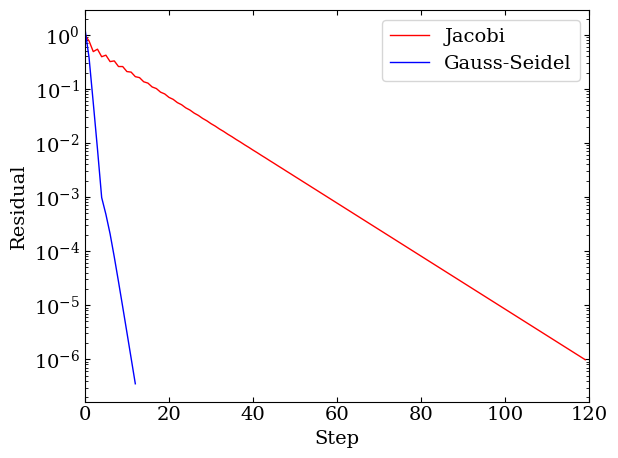

In [87]:
plot(res1, res2)